Secara matematis, persamaan dari Simple Linear Regression adalah sebagai berikut:

y = mx + b + e

y = dependent variable
m = slope dari garis (persamaan diatas merupakan sebuah garis)
x = independent variable
b = intercept
e = error

https://medium.com/@adiptamartulandi/belajar-machine-learning-simple-linear-regression-di-python-e82972695eaf

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('LN2-car.csv', usecols=['horsepower', 'price'])

In [4]:
#Melihat 5 baris teratas dari data.
#Independent variabel(x) adalah horsepower.
#Dependent variabel(y) adalah price.
df.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


In [5]:
#Mengetahui jumlah kolom dan baris dari data.
#Data kita mempunya 2 kolom dengan 200 baris.
df.shape

(200, 2)

In [6]:
#Melihat informasi data kita mulai dari jumlah data, tipe data, memory yang digunakan dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  200 non-null    float64
 1   price       200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [7]:
#Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
df.describe()

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


In [8]:
#Mencari dan menangani missing values.
#Ternyata data kita tidak ada missing values.
df.isnull().sum()

horsepower    0
price         0
dtype: int64

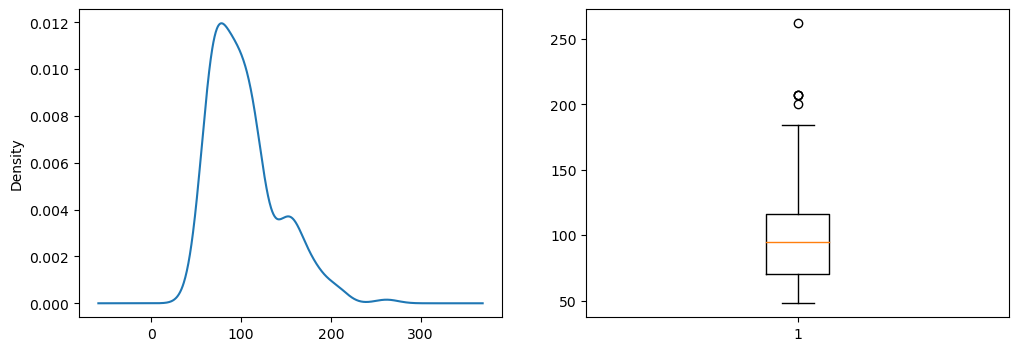

In [9]:
#Univariate analysis horsepower.
#Melihat distribusi dari horsepower.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['horsepower'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['horsepower'])
plt.show()

Dapat dilihat bahwa mean dan median dari horsepower terpusat di sekitar nilai 100.
Distribusinya hampir mirip dengan distribusi normal namun persebaran data kurang merata (memiliki standard deviasi yang tinggi) karena memiliki whiskers boxplot yang panjang.
Terdapat 3 outliers data yang bisa dilihat di boxplot.

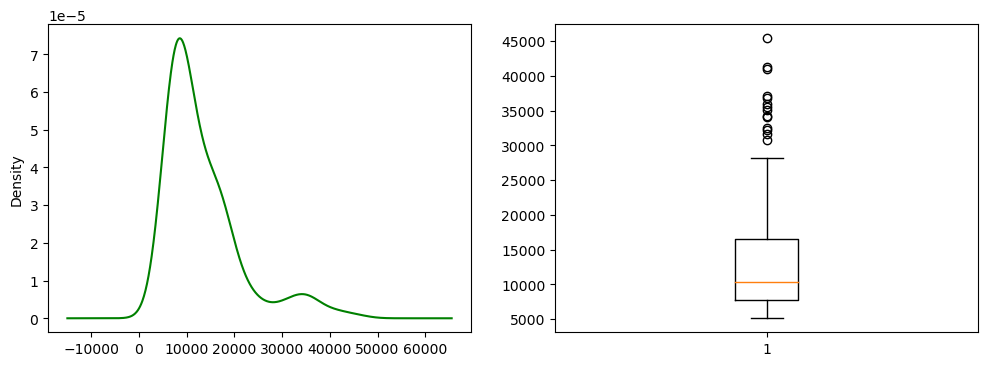

In [10]:
#Univariate analysis price.
#Melihat distribusi dari price.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['price'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

Mean dan median dari horsepower terpusat di sekitar nilai 10000.
Distribusinya lebih ke right skew dan persebaran data kurang merata (memiliki standard deviasi yang tinggi).
Data memiliki banyak outliers jika dibandingkan dengan horsepower.

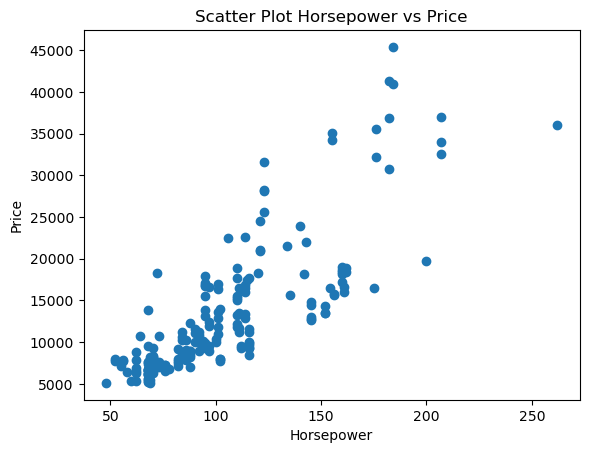

In [11]:
#Bivariate analysis horsepower dan price.
#Menggunakan scatter plot.
plt.scatter(df['horsepower'], df['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot Horsepower vs Price')
plt.show()

Dari scatter plot dapat dilihat secara kasat mata bahwa data memiliki korelasi positif yang cukup signifikan.
Hal ini berarti dengan bertambahnya nilai dari horsepower maka nilai price pun akan bertambah.

In [12]:
#Mengetahui nilai korelasi dari horsepower dan price.
#Nilai korelasinya adalah 0.81 termasuk kategori sangat tinggi.
df.corr()

,horsepower,price
horsepower,1.000000,0.811097
price,0.811097,1.000000


In [13]:
#Pertama, buat variabel x dan y.
x = df['horsepower'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
lin_reg = LinearRegression()

In [16]:
lin_reg.fit(x_train, y_train)

LinearRegression()

In [17]:
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[167.27576813]]
[-4196.02366444]


Dari nilai m dan b diatas, kalau dimasukan ke dalam rumus menjadi:
Y = 164.73x — 3911.83

In [18]:
lin_reg.score(x_test, y_test)

0.6607517572581356

Text(0.5, 1.0, 'Plot Horsepower vs Price')

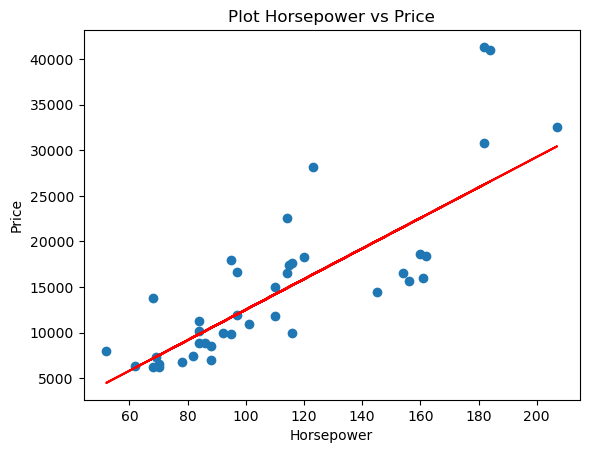

In [19]:
y_prediksi = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_prediksi, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

In [20]:
#Prediksi harga mobil dengan horsepower 100.
lin_reg.predict([[100]])

array([[12531.55314817]])